<h1 style="text-align: center;">Equipment Anomaly Detection Exercise</h1><br>

![alt text](img/ep_anomaly.jpg "Equipment Anomaly")

<p>This is a set of real data collected over time which is unlabelled comprising various parameters to determine the condition of a group of equipment (3 types but of different makes coming from different suppliers in the form of equipment ID).</p>
    <p>The type of equipment is an important factor to consider to see which are the normal ones and which are the one that need to be monitored with suspected unhealthy conditions.The equipment of the same type will have the similar behavious but they are not so important in the outcome which we want to see.</p>
    <p>Also,we would like to know if there is any correlation among the parameters in a way a change in one parameter will affect another.</p>
<p>The PD average magnitude and PD count measures the equipment health and they can be affected by the other parameters(as shown) in which the equipment are operating in.</p>
<p>requirement to run this notebook:</p>
<ul>
    <li>Python=3.7.9</li>
    <li>pandas=1.1.4</li>
    <li>numpy=1.18.5</li>
    <li>matplotlib=3.3.2</li>
    <li>seaborn=0.11.0</li>
    <li>sklearn=0.23.2</li>
    <li>tensorflow=2.3.0</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
PD_df = pd.read_csv(r'dataset/PD_data.csv') #read in dataset as pandas dataframe

<h3>Drop Equipment ID Columns</h3>
<p><b>Equipment ID is an indicator to indentify which row of data belongs to which equipment in physical. Hence, it does not provides insight of an anomaly activity among all the features. It will be just an noisy column and we will just drop this for the moment.</b></p>

In [2]:
df = PD_df.drop('Equipment ID', 1)
print(df)

     PD Average  PD Count  Temperature  Humidity  Loading
0        424.19        19         27.0      56.0    250.0
1        565.25        12         27.0      56.0    250.0
2       1881.07         6         29.2      71.6    300.0
3        774.28        14         26.3      71.5    585.0
4        502.98        20         27.2      62.4    700.0
5       3202.67        13         32.0      51.3    850.0
6       3032.09        14         32.0      51.3    850.0
7       3709.10        13         32.0      51.3    850.0
8       1011.00        20         30.1      59.6     15.0
9       1060.00        28         30.1      59.6      5.0
10      1100.00        11         30.1      59.6      5.0
11       964.00        15         30.1      59.6     15.0
12      1366.03        28         30.4      67.6   1641.0
13       611.56        45         31.5      60.5    227.0
14      1144.09        22         30.4      64.3     49.0
15      2288.51         2         35.0      70.0    236.0
16       973.7

<h3>Find the correlation between each features</h3>
<p>Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables. In other words, it's how two variables move in relation to one another. There are several terms that apply in correlations.</p>
<ol>
    <li>Positive correlation</li>
    <li>Negative correlation</li>
    <li>Zero Correlation</li>
</ol>
<p>These 3 terms describe how's correlation work in describing the relation of 2 variables.</p>

             PD Average  PD Count  Temperature  Humidity   Loading
PD Average     1.000000  0.283660     0.123917 -0.069950  0.323888
PD Count       0.283660  1.000000     0.074758 -0.096785  0.261152
Temperature    0.123917  0.074758     1.000000 -0.192906  0.041949
Humidity      -0.069950 -0.096785    -0.192906  1.000000 -0.271953
Loading        0.323888  0.261152     0.041949 -0.271953  1.000000




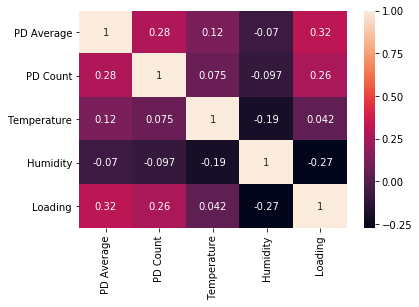

In [3]:
import seaborn as sns
print(df.corr('pearson'))
print('\n')
sns.heatmap(df.corr('pearson'), annot=True)
plt.show()

<p>In the graph above, we can observe that:</p>
<ul>
<li>Each variable does not really have a strong correlation with another variable.(correlation values are lower than ±0.5</li>
<li>The highest positive correlation value is only 0.32. ('Loading' & 'PD Average' variable)</li>
<li>The lowest negative correlation value is -0.27. ('Humidity' & 'Loading')</li>
<li>'PD Average' & 'PD Count' have some minor positive correlation with 'Loading' parameters.</li>
</ul>
<p><b><i>Hence, we can make an hypothesis that when 'Loading' parameters value increases, 'PDAverage' & 'PD Count' values will have the likelihood to increase. 'PD Average' have higherprobability to increase compared to 'PD count'. Both 'PD Average' & 'PD Count' parametersprobability of increasing is not high due to the correlation value (with 'Loading') are lessthan or equal to 0.32.</i></b></p>

<h3>Check for null value</h3>
<p>Before furthur analysis action, it is important to check whether is there any null or NaN value is in the dataset. We would want to drop the row that are involving empty value.</p>
<p>Fortunately, the dataset does not involve any empty value.</p>

In [4]:
df.isnull().sum()

PD Average     0
PD Count       0
Temperature    0
Humidity       0
Loading        0
dtype: int64

<h3>Standardize to 0 mean and 1.0 variance</h3>

![alt text](img/standardization.jpeg "Standardization") 

<h6>What is Standardization ?</h6>
<p>“Standardizing” a vector most often means subtracting a measure of location and dividing by a measure of scale. For example, if the vector contains random values with a Gaussian distribution, you might subtract the mean and divide by the standard deviation, thereby obtaining a “standard normal” random variable with mean 0 and standard deviation 1.</p>
<h6>Why Standardization ?</h6>
<p>Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bias.For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability.</p>
<h6>When to use Standardization ?</h6>
<p>Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and K-Means Clustering.</p>
<p>In order to perform standardization of each columns, there are few information we need to get from pandas dataframe.</p>

<h6>The description of each features.</h6>

In [5]:
print(df['PD Average'].describe())
print('\n')
print(df['PD Count'].describe())
print('\n')
print(df['Temperature'].describe())
print('\n')
print(df['Humidity'].describe())
print('\n')
print(df['Loading'].describe())

count     559.000000
mean      683.493864
std       730.720851
min        35.610000
25%       106.835000
50%       323.740000
75%      1137.920000
max      4891.420000
Name: PD Average, dtype: float64


count    559.000000
mean      14.395349
std       10.286194
min        1.000000
25%        7.000000
50%       12.000000
75%       18.000000
max       66.000000
Name: PD Count, dtype: float64


count    559.000000
mean      29.149374
std        3.480390
min       21.900000
25%       25.700000
50%       29.400000
75%       32.000000
max       39.900000
Name: Temperature, dtype: float64


count    559.000000
mean      60.695832
std       12.083263
min       37.180000
25%       52.890000
50%       61.100000
75%       68.550000
max       87.900000
Name: Humidity, dtype: float64


count     559.000000
mean      350.438927
std       624.791790
min         0.000000
25%         5.000000
50%        27.170000
75%       457.000000
max      2459.000000
Name: Loading, dtype: float64


<h3>Standardize each columns</h3>
<p><b>Here we will standardize each columns values by compressing in to range of -1 to 1.</b></p>

In [6]:
from sklearn.preprocessing import StandardScaler
df['PD Average'] = StandardScaler().fit_transform(df['PD Average'].values.reshape(-1, 1))
df['PD Count'] = StandardScaler().fit_transform(df['PD Count'].values.reshape(-1, 1))
df['Temperature'] = StandardScaler().fit_transform(df['Temperature'].values.reshape(-1, 1))
df['Humidity'] = StandardScaler().fit_transform(df['Humidity'].values.reshape(-1, 1))
df['Loading'] = StandardScaler().fit_transform(df['Loading'].values.reshape(-1, 1))
print(df)

     PD Average  PD Count  Temperature  Humidity   Loading
0     -0.355178  0.448054    -0.618120 -0.388971 -0.160900
1     -0.161963 -0.233079    -0.618120 -0.388971 -0.160900
2      1.640365 -0.816907     0.014559  0.903227 -0.080801
3      0.124353 -0.038469    -0.819427  0.894944  0.375759
4     -0.247257  0.545359    -0.560604  0.141162  0.559985
5      3.450610 -0.135774     0.819787 -0.778287  0.800280
6      3.216960 -0.038469     0.819787 -0.778287  0.800280
7      4.144286 -0.135774     0.819787 -0.778287  0.800280
8      0.448597  0.545359     0.273382 -0.090771 -0.537362
9      0.515715  1.323797     0.273382 -0.090771 -0.553382
10     0.570504 -0.330384     0.273382 -0.090771 -0.553382
11     0.384220  0.058835     0.273382 -0.090771 -0.537362
12     0.934895  1.323797     0.359657  0.571895  2.067436
13    -0.098531  2.977978     0.675997 -0.016221 -0.197745
14     0.630896  0.739969     0.359657  0.298545 -0.482895
15     2.198451 -1.206126     1.682532  0.770694 -0.1833

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


<h3>Principal Component Analysis</h3>

![alt text](img/PCA2.png "Principla Component Analysis")

<h6>What is PCA ?</h6>
<p>PCA is a method used to reduce number of variables in your data by extracting important one from a large pool. It reduces the dimension of your data with the aim of retaining as much information as possible. In other words, this method combines highly correlated variables together to form a smaller number of an artificial set of variables which is called “principal components” that account for most variance in the data.</p>
<h6>When to use PCA ?</h6>
<ol>
    <li>When you want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration.</li>
    <li>Want to ensure your variables are independent of one another.</li>
    <li>Want to make your independent variables less interpretable.</li>
</ol>
<h6>Why use PCA in current dataset?</h6>
<p>From the dataset provided, there are around 5 features provided. In order to have a clearer view of data distribution, PCA helps in:</p>
<ol>
    <li>Reduce the current dataset dimension from 5 to 3. Hence we able to have a clear view of how current dataset distribution in 3D graph.</li>
    <li>Reduce the current dataset dimension from 5 to 1. Hence, we able to calculate the distance of each points to identify the outlier that exists in the dataset.</li>
</ol>

In [7]:
from sklearn.decomposition import PCA
import copy
df_reduce = copy.deepcopy(df)
pca = PCA(3) # compressed 5 dimension to 3
pca.fit(df_reduce)

newdf = pd.DataFrame(pca.transform(df_reduce))
print(newdf)

            0         1         2
0   -0.072901  0.203069 -0.549959
1   -0.295322  0.031585 -0.632741
2    0.059328  0.738545  0.868082
3   -0.311273  1.131365 -0.172954
4    0.235340  0.635071 -0.476810
5    2.643995  0.169992  0.848798
6    2.571290  0.129144  0.795076
7    2.995732  0.389982  1.069470
8    0.296289  0.022931  0.606396
9    0.687675  0.308041  0.799227
10  -0.062641 -0.239855  0.466339
11   0.034793 -0.163742  0.482882
12   2.109488  1.121805  0.253368
13   1.428530  0.504264  1.102498
14   0.383383  0.321097  0.943373
15   0.598501 -0.407577  1.996568
16  -0.177337 -0.878942  1.485499
17  -0.251111 -0.915834  1.422998
18   0.043646 -0.731482  1.607922
19   1.674151  1.303658  1.711671
20  -0.431571 -0.230700  0.771688
21   0.180365  0.155044  1.213735
22   2.229579 -1.126822  1.567699
23  -0.671121  0.031808  0.563363
24  -0.443864  0.813412  0.763687
25   0.512578  0.864367 -0.991120
26   1.757938  1.763505 -0.420630
27  -0.172638  0.744087 -0.469200
28  -0.897070 

<h3>K-Means Clustering</h3> 

![alt text](img/k_means2.png "K means Algorithm")

<h6>What is K-Means Clustering ?</h6>
<p>K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.</p>
<h6>Why K-Means Clustering ?</h6>
<p>The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group.</p>
<p><b>From the description of Mr.Leong, The dataset should consist of 3 different group & each type of equipment should have the similar behaviour. Hence, i can leverage k-means clustering method to cluster each group without any label provided.</b></p>

In [8]:
from sklearn.cluster import KMeans 

c_newdf = copy.deepcopy(newdf)

KM = KMeans(n_clusters=3) #from 3 diffrent supplier
KM.fit(c_newdf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
labels = KM.predict(c_newdf)
centroids = KM.cluster_centers_

print(labels)
print('\n')
print(centroids)

[1 1 1 1 1 2 2 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 2 1 1 1 2 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 1 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2
 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 2 1 2 2 2 1 0 1 2 1 1 0 1 0 0 2 0 0 0 0
 2 0 0 0 2 0 1 1 2 0 2 1 0 0 0 0 0 2 0 0 0 0 1 1 1 2 1 2 2 2 2 2 0 0 0 0 2
 2 2 2 2 2 2 2 0 0 0 0 0 0 0 1 1 2 0 0 2 2 2 0 0 0 0 2 2 2 2 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 0 1 1 1 2 2 0 0
 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 

In [10]:
df2 = copy.deepcopy(c_newdf)
df2['cluster'] = labels.astype('float')
PD_df['cluster'] = labels.astype('int') #append into original dataframe
print(c_newdf)
print('\n')
print(df2)

            0         1         2
0   -0.072901  0.203069 -0.549959
1   -0.295322  0.031585 -0.632741
2    0.059328  0.738545  0.868082
3   -0.311273  1.131365 -0.172954
4    0.235340  0.635071 -0.476810
5    2.643995  0.169992  0.848798
6    2.571290  0.129144  0.795076
7    2.995732  0.389982  1.069470
8    0.296289  0.022931  0.606396
9    0.687675  0.308041  0.799227
10  -0.062641 -0.239855  0.466339
11   0.034793 -0.163742  0.482882
12   2.109488  1.121805  0.253368
13   1.428530  0.504264  1.102498
14   0.383383  0.321097  0.943373
15   0.598501 -0.407577  1.996568
16  -0.177337 -0.878942  1.485499
17  -0.251111 -0.915834  1.422998
18   0.043646 -0.731482  1.607922
19   1.674151  1.303658  1.711671
20  -0.431571 -0.230700  0.771688
21   0.180365  0.155044  1.213735
22   2.229579 -1.126822  1.567699
23  -0.671121  0.031808  0.563363
24  -0.443864  0.813412  0.763687
25   0.512578  0.864367 -0.991120
26   1.757938  1.763505 -0.420630
27  -0.172638  0.744087 -0.469200
28  -0.897070 

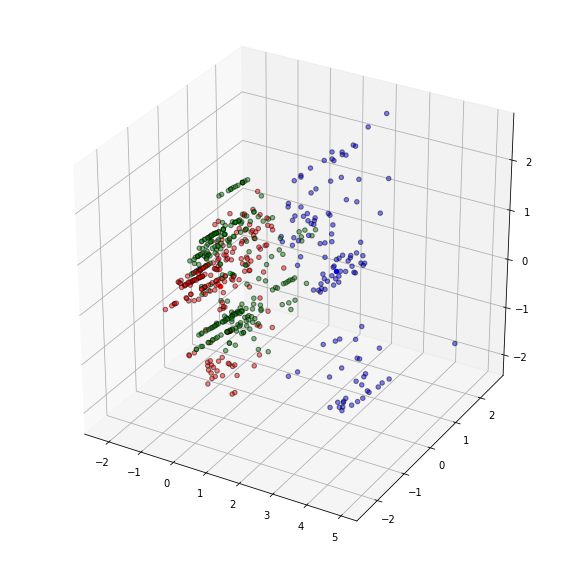

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig0 = plt.figure(figsize=(10,10))
fig = fig0.add_subplot(111,projection='3d')
colmap = {1: 'r', 2: 'g', 3: 'b'}

colors = map(lambda x: colmap[x+1], labels)

fig.scatter(df2[0], df2[1], df2[2], color=list(colors), alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    fig.scatter(*centroid, color=colmap[idx+1])
plt.show()

<p>From the 3D graph above, it clearly define each cluster into group 0 : red, group 1 : green & group 2 : blue.
Group 0 (red) & group 1 (green) shows that each datapoint distance are fairly close to the centroids, clusters are more concentrated compare to group 2 (blue).<p>
<p>The analysis from this graph tell us that there are high possibility that might have anomaly behaviour in the cluster of group 2 (blue).</p>
<p>For next steps, we will move on to leverage machine learning & deep learning algorithm to find out the outliers inside current dataset.</p>
<p>Approachs that will be using:</p>
<ol>
<li>Find outliers using **K means algorithm (ML)** for Anomaly detection.</li>
<li>Find outliers using **Autoencoder algorithm (DL)** for Anomaly detection.</li>
<li>compare the result of 2 model.</li>
<li>Identify risk of each datapoint base on both model result.</li>
    <ul>
      <li>if either one model result is anomaly --> Potential Risk</li>
      <li>both model result is anomaly --> High Risk</li>
      <li>both model result is normal --> Low Risk</li>
    </ul>
</ol>

<h1 style="text-align: center;"> K-Means Anomaly Detection</h1>

![alt-text](img/kmeans_anomaly.png "anomaly detection using k means")

<p>In order to fit this dataset into k means, we will first have to compress the current 5 dimensional dataset into 1 dimensional. Hence, we will be able to view the dataset in 1 dimensional space and perform distance calculation from the centroids.</p>
<ol>
    <li>Using PCA to reduce the dataset dimension in 1 dimension.</li>
    <li>Define K means algorithm and set the cluster size to 1. (we just need to see how close the data's are group to each other)</li>
    <li>Get the mean of all data points distance.</li>
    <li>Get the standard deviation of all data points distance.</li>
    <li>Get the sum of mean & standard deviation.</li>
    <li>Define the threshold using the result of step 5.</li>
    <li>Plot the graph & we will have the view of how many outliers are inside this dataset.</li>
</ol>

In [14]:
import pickle as pk
#Reducing the dataset dimension from 5 into 1.
AD_reducedf = copy.deepcopy(df)

pca_AD = PCA(1)
pca_AD.fit(AD_reducedf)
pk.dump(pca_AD, open('model/pca_model.pkl', 'wb'))
pca_reload = pk.load(open('model/pca_model.pkl','rb'))
AD_lmdf = pd.DataFrame(pca_reload.transform(AD_reducedf))
print(AD_lmdf)

kmeans_AD = KMeans(n_clusters=1)
kmeans_AD.fit(AD_lmdf)
pk.dump(kmeans_AD, open('model/kmeans_model.pkl','wb'))

kmeans_load = pk.load(open('model/kmeans_model.pkl', 'rb'))
print(kmeans_load)

            0
0   -0.072901
1   -0.295322
2    0.059328
3   -0.311273
4    0.235340
5    2.643995
6    2.571290
7    2.995732
8    0.296289
9    0.687675
10  -0.062641
11   0.034793
12   2.109488
13   1.428530
14   0.383383
15   0.598501
16  -0.177337
17  -0.251111
18   0.043646
19   1.674151
20  -0.431571
21   0.180365
22   2.229579
23  -0.671121
24  -0.443864
25   0.512578
26   1.757938
27  -0.172638
28  -0.897070
29   1.086327
..        ...
529 -0.927917
530 -0.973896
531 -1.296611
532 -1.292201
533 -1.249199
534 -0.378198
535 -1.296635
536 -0.486511
537 -1.206872
538 -0.392699
539 -1.242676
540 -0.625857
541 -1.361453
542 -0.908242
543 -0.692546
544 -1.121191
545 -0.070839
546 -0.711570
547 -0.402161
548 -0.364266
549 -0.235958
550 -0.068274
551 -0.636083
552 -1.053706
553 -0.346763
554 -0.774248
555 -0.722389
556 -1.058264
557 -0.593568
558 -0.637984

[559 rows x 1 columns]
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1,

In [15]:
#Get the centroids of current 1 dimensional cluster
kmad_center = kmeans_load.cluster_centers_
print(kmad_center)

[[-1.94636595e-17]]


In [17]:
distance = np.sqrt((AD_lmdf - kmad_center)**2) #Calculate distances each datapoints from it's centroids value
print(distance.describe())
k_threshold = 1.847804 # mean + standard deviation

PD_df['kmeans_predict'] = ["normal" if x < k_threshold else "anomaly" for x in distance[0]] #append into original dataframe

k_anomaly = [x for x in distance[0] if x >= k_threshold]
k_normal = [x for x in distance[0] if x < k_threshold]
anomaly_index = [x for x in range(len(k_anomaly))]
normal_index = [x for x in range(len(k_normal))]

k_group = [(anomaly_index, k_anomaly, "anomaly"),(normal_index, k_normal, "normal")]
_, kmplot = plt.subplots(figsize=(10,10))

for k_idx, k_data, kname in k_group:
    kmplot.plot(k_idx, k_data, marker='o', ms=3.5, linestyle='',
               label= "Anomaly" if kname == "anomaly" else "Normal",
             color = "r" if kname == "anomaly" else "g")
kmplot.hlines(k_threshold, kmplot.get_xlim()[0], kmplot.get_xlim()[1], colors="b", zorder=100, label='Threshold')
kmplot.set_title('K Means Prediction  Result')
kmplot.set_xlabel('Index')
kmplot.set_ylabel('Distance to Centroids')
plt.legend()

ValueError: Unable to coerce to DataFrame, shape must be (559, 1): given (1, 1)

<p>From the K Means result, we have been able to detect the outliers data point from the graph above. Hence, for the data point that are <b>above</b> the threshold value will be labelled as <b>anomaly</b> (red dot in the graph) & those are <b>below</b> threshold value will be labelled as <b>normal</b> (green dot in the graph).</p>
<p>These label will be appended into the original dataframe for result recording purpose. We will then move on to use deep learning method for detecting the anomaly activities in current dataset.</p>

<h1 style="text-align: center;">Autoencoder for Anomaly Detection</h1>

![alt text](img/autoencoder2.png "Autoencoder")

<h3>What is Autoencoder ?</h3>
<p>Autoencoder is an unsupervised neural network algorithms that able to:</p>
<ul>
    <li>Accept an input set of data</li>
    <li>Compress the data into a latent-space representation using encoder</li>
    <li>Reconstruct the input data from the latent-space using decoder </li>
</ul>
<p>In details, Autoencoder is a neural network designed to learn an identity function in an unsupervised way to reconstruct the original input while compressing the data in the process so as to discover a more efficient and compressed representation.</p>
<p>In whole Autoencoder Architecture, we train the encoder the focus on the important common features from dataset and train the decoder to reconstruct it's input base on the important features from encoder.</p>
<h3>Why use Autoencoder on current dataset ?</h3>
<p>Autoencoder is one of the most effective anomaly detection algorithms that apply in many domain, be it images, time series or tabular data.</p>
<p>For current dataset, the challenges is do not contain any label. Unlabelled dataset will be categorize under unsupervised learning. As per anomaly detection domain, the dataset usually are highly imbalanced in distribution (normal & anomaly). From the 3D graph that generate using K-Means, we can see that, majority of data points are quite close to each other and there are minority of data point are far from the centroids.</p>
<p><b>Hence, we can make an hypothesis that this dataset distribution of normal & anomaly class are also imbalanced.</b></p>
<p>With the assumption made,  we can leverage the strength of Autoencoder, let the neural network learn the common pattern in the dataset (normal class). At the end of training, we shall expect the neural network will have high reconstruction error for anomaly data point and low reconstruction point for normal data point.</p>
<h3>Steps to train an Autoencoder</h3>
<ul>
    <li>Drop the Equipment ID column (noise) & standardize the dataset. (already perform in the early stages)</li>
    <li>Split the dataset into 80%(train) & 20%(test) and convert to numpy array.</li>
    <li>Construct an Autoencoder Neural Network. (tf.keras)</li>
    <li>Fit train set for training, fit test set for testing.</li>
    <li>Plot the training loss & testing loss (if is converge, then move to next step)</li>
    <li>Inference on whole dataset to get the reconstruction loss.</li>
    <li>Get the mean & standard deviation value and sum them up.</li>
    <li>Set the threshold value base on the previous step.</li>
    <li>plot the reconstruction loss graph and segregate out anomaly and normal class base on threshold value.</li>
</ul>

In [ ]:
# define the train set and test set 
from sklearn.model_selection import train_test_split
AE_DF = copy.deepcopy(df)
split = 0.2
train, test = train_test_split(AE_DF, test_size = split, random_state=1000)

In [ ]:
# convert pandas dataframe to numpy arrays
train = train.values #to numpy array
test = test.values #to numpy array

print("train shape : ", train.shape)
print("test shape : ", test.shape)

In [ ]:
# Construct the Autoencoder Neural Network here
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

features_dim = 32

autoencoder = Sequential()
autoencoder.add(Dense(units = features_dim, input_shape = (train.shape[1],), activation = 'relu'))
autoencoder.add(Dense(units = int(features_dim / 2), activation = "relu"))

autoencoder.add(Dense(units = int(features_dim / 4), activation = "relu"))
autoencoder.add(Dense(units = int(features_dim / 4), activation = "relu"))

autoencoder.add(Dense(units = int(features_dim / 2), activation = "relu"))
autoencoder.add(Dense(units = features_dim, activation = "relu"))
autoencoder.add(Dense(units = train.shape[1], activation = 'linear'))

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

autoencoder.summary()

In [5]:
# Start the Autoencoder NN training
epoch = 100
batch_size = 64

checkpointer = ModelCheckpoint(filepath="model/AE_model.h5",
                               verbose = 0,
                               save_best_only=True)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=1,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(train, train, 
                          epochs = epoch, 
                          batch_size = batch_size,
                          shuffle = True,
                          validation_data = (test, test),
                          verbose = 0,
                          callbacks=[checkpointer, tensorboard]).history

NameError: name 'ModelCheckpoint' is not defined

NameError: name 'history' is not defined

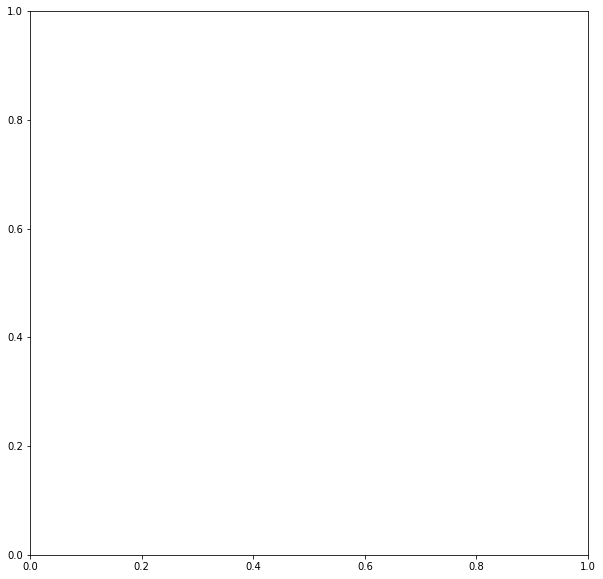

In [6]:
# Plot the training loss & testing loss
_, trainax = plt.subplots(figsize=(10,10))
trainax.plot(history['loss'])
trainax.plot(history['val_loss'])

trainax.set_title('Training Loss')
trainax.set_xlabel('Epochs')
trainax.set_ylabel('Loss')
trainax.legend(['Train', 'Test'], loc = 'upper right')

In [7]:
# prepare another copy of whole dataset as numpy arrays
test_df = copy.deepcopy(df)
test_df = test_df.values
print(test_df)

NameError: name 'copy' is not defined

In [8]:
# Perform inferencing base of the training AE model
from tensorflow.keras.models import load_model

save_model = load_model('model/AE_model.h5') #load the save model
predict = save_model.predict(test_df)
mse = np.mean(np.power(predict - test_df, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse})
print(error_df.describe())
print(error_df['reconstruction_error'].std().item())

ModuleNotFoundError: No module named 'tensorflow'

In [9]:
# Calculate the threshold value base on mean and standard deviation of reconstruction loss
threshold = error_df['reconstruction_error'].mean().item() + error_df['reconstruction_error'].std().item() #mean + standard deviation
mse_list = mse.tolist()
_, aeax = plt.subplots(figsize=(12,12))

PD_df['AE_predict'] = ["normal" if x < threshold else "anomaly" for x in error_df.reconstruction_error] #append into original dataframe

anomaly = [x for x in mse_list if x >= threshold]
idx_anomaly = [x for x in range(len(anomaly))]
normal = [k for k in mse_list if k < threshold]
idx_normal = [x for x in range(len(normal))]
group = [(idx_anomaly, anomaly, "anomaly"), (idx_normal, normal, "normal")]

# Plot the graph of reconstruction loss & we will able to identify the anomaly and normal class base on threshold value.
for idx, pt, name in group:
    aeax.plot(idx, pt, marker='o', ms=3.5, linestyle='', 
              label= "Anomaly" if name == "anomaly" else "Normal",
             color = "r" if name == "anomaly" else "g")
aeax.hlines(threshold, aeax.get_xlim()[0], aeax.get_xlim()[1], colors="b", zorder=100, label='Threshold')
aeax.set_title('Prediction  Result')
aeax.set_xlabel('Index')
aeax.set_ylabel('Reconstruction Loss')
plt.legend()

NameError: name 'error_df' is not defined

<h3>Results</h3>
<p>Now that we already have the inference result from Autoencoder and K means algorithms. We will proceed to append both algorithm inference result into the original dataframe.</p>
<p>Due to the dataset are unlabelled, we need more justifications towards the confident level of each model. Hence, what we can proceed to leverage the inference result of two model as below:</p>
<ul>
    <li><b>If either model inference are anomaly, then the equipment are is Potential risk category.</b></li>
    <li><b>If both model inference are anomaly, then the equipment are is High risk category.</b></li>
    <li><b>If both model inference are normal, then the equipment are is Low risk category.</b></li>
</ul>
<p>Base on the risk labels, we can proceed to have an physical test on the equipments to verify it's healhtiness level.</p>
<p>We can prioritize the checking base on the risk label.</p>
<ul>
    <li>High risk ---> First priority</li>
    <li>Potential risk ---> Second priority</li>
    <li>Low risk ---> Low priority / Continue to work in production</li>
</ul>

In [10]:
# Calculate the quantity of both model inference result are same & not same.
PD_df['is_match'] = ['true' if x == y else 'false' for x,y in zip(PD_df['kmeans_predict'],PD_df['AE_predict'])]
ismatch = [x for x in PD_df['is_match'] if x == 'true']
notmatch = [x for x in PD_df['is_match'] if x == 'false']
print("len of match : ", len(ismatch), " len of mismatch : ", len(notmatch))

NameError: name 'PD_df' is not defined

In [11]:
# Assign risk label for each data points base of both model inference results
PD_df['risk_label'] = ['High' if x == 'anomaly' and y == 'anomaly' else 'Potential' if x == 'anomaly' or y == 'anomaly' else 'Low' for x,y in zip(PD_df['kmeans_predict'],PD_df['AE_predict'])]
print(PD_df)
PD_df.to_csv(r'result.csv',index = False)

NameError: name 'PD_df' is not defined

In [ ]:
# Plot the quantity graph base on each risk labels
high_risk = [x for x in PD_df['risk_label'] if x == 'High']
potential_risk = [x for x in PD_df['risk_label'] if x == 'Potential']
low_risk = [x for x in PD_df['risk_label'] if x == 'Low']

quantity = [len(high_risk), len(potential_risk), len(low_risk)]
risk_categories = ['High ' + str(len(high_risk)), 'Potential ' + str(len(potential_risk)), 'Low ' + str(len(low_risk))]

group_plt = plt.figure()
ax_plt = group_plt.add_axes([0,0,1,1])

ax_plt.bar(risk_categories,quantity)
ax_plt.get_children()[0].set_color('r')
ax_plt.get_children()[1].set_color('yellow')
ax_plt.get_children()[2].set_color('g')
plt.show()

<h3>Conclusion</h3>
<p>Base on the data analysis technique & information provided by Mr.Leong, we get the insight for this dataset as below:</p>
<ul><b>
    <li>There are 3 clusters of equipment(without labels) that have similar patterns within each group, we can cluster each cluster using the K-means clustering algorithm.</li>
    <li>The graph of K-means clustering shows that cluster 2 distributions are inconsistent.</li>
    <li>The graph distribution for K-means & Autoencoder results are quite similar. This shows that both algorithms (ML & DL) are telling almost the same story based on the pattern inside the dataset provided.</li>
    <li>cluster 2 (blue) is the group that has the most outliers.</li>
    <li>The total 18 outliers are from cluster 2 (blue).</li>
    <li>Total 44 out of 76 Potential risks are from cluster 2 as well.</li>
    <li>Cluster 0 & 1 having more consistent behaviour compared to cluster 2.</li>
</b></ul>

<h3>Future Works</h3>
<p>The analysis at this point is not the final solutions to predict for anomaly activities in equipments, the reason are as below:</p>
<ul>
    <li>The data point that provided are not exactly sufficient at this point</li>
    <li>The inference result are not justify by any subject matter expert ME)</li>
</ul>
<p>Hence, belows are my proposal for furthur making the models(ML & DL) more robust in the productions line:</p>
<ul>
<li>First of all, more dataset/data points. No limit needed, as much as possible.</li>
<li>Having an SME to validate the model inference result & provide labels for the dataset from time to time.</li> 
</ul>
<p>With that means, we will have more labels to train on Autoencoder. The idea here is to let Autoencoder only learn the pattern of normal data point. Hence, when an abnormal data point comes, Autoencoder will generally have high reconstruct error value (because it never see such an distinctive data point).</p>